# Taller 6: Redes Nueronales

## Importar librerias

In [226]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

## Punto 1. Clasificación con redes neuronales - Datos iris

### Datos, Selección y División

Descarga Datos Iris

In [227]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Selección de Especimen

In [228]:
y = tf.keras.utils.to_categorical(iris.target, num_classes=3)
y_s = y[:,[0]]
y_s

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

División de datos (entrenamiento, validación, prueba)

In [229]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, y_s, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

X_train.shape

(96, 4)

In [230]:
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

[[6.  3.  4.8 1.8]
 [6.7 3.1 4.7 1.5]
 [5.5 2.4 3.7 1. ]]
[[ 0.16110746 -0.23717928  0.58382847  0.77996804]
 [ 1.01358158 -0.01611898  0.52732894  0.3865691 ]
 [-0.44780262 -1.56354107 -0.03766635 -0.2690958 ]]


### Modelo Base

Creación del modelo base (capa de entrada, capa oculta con 8 neuronas y una capa de salida comn una neurona para la única categoria)

In [231]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
base = tf.keras.Sequential()
base.add(tf.keras.layers.InputLayer(input_shape=(4,)))
base.add(tf.keras.layers.Dense(8, activation="relu"))
base.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [232]:
base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [233]:
base.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Entrenamiento del modelo base

In [234]:
history_base = base.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.3906 - loss: 0.8788 - val_accuracy: 0.3750 - val_loss: 0.8687
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4453 - loss: 0.8566 - val_accuracy: 0.3750 - val_loss: 0.8456
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4792 - loss: 0.8354 - val_accuracy: 0.4167 - val_loss: 0.8233
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.4883 - loss: 0.8149 - val_accuracy: 0.4167 - val_loss: 0.8020
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5104 - loss: 0.7952 - val_accuracy: 0.5000 - val_loss: 0.7814
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5469 - loss: 0.7764 - val_accuracy: 0.5000 - val_loss: 0.7618
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5690 - loss: 0.7583 - val_accuracy: 0.5000 - val_loss: 0.7429
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6003 - loss: 0.7407 - val_accuracy: 0.5000 - val_loss

Grafica historial de pérdida de entrenamiento y validación

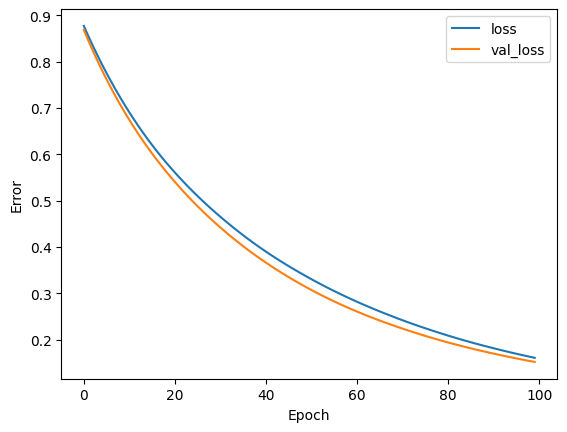

In [235]:
plt.plot(history_base.history['loss'], label='loss')
plt.plot(history_base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

### Metricas

In [236]:
y_test

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [237]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred_base = base.predict(X_test)
#y_pred_base_classes = np.argmax(y_pred_base, axis=1)
#y_pred_base_classes
y_pred_base

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0.13527368],
       [0.7305828 ],
       [0.01343021],
       [0.14064416],
       [0.10260486],
       [0.7667849 ],
       [0.2755604 ],
       [0.06180725],
       [0.0555421 ],
       [0.18623507],
       [0.1175086 ],
       [0.88359994],
       [0.78190243],
       [0.8680171 ],
       [0.8414425 ],
       [0.21876849],
       [0.05847247],
       [0.20004302],
       [0.14845794],
       [0.04256823],
       [0.87224525],
       [0.11419317],
       [0.8197032 ],
       [0.04678205],
       [0.1408042 ],
       [0.05438655],
       [0.03500995],
       [0.06986162],
       [0.8693853 ],
       [0.8661298 ]], dtype=float32)

In [238]:
y_test

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [239]:
print(y_test[0][0])
print(y_pred_base[0][0])

0.0
0.13527368


[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


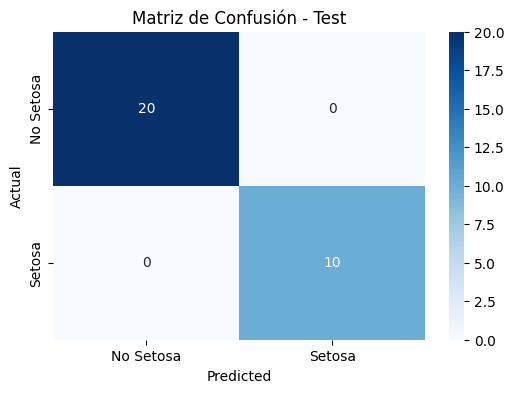

In [240]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)

# Example usage:
y_pred_base = to_binary_predictions(y_pred_base)

print(y_pred_base)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_base)
precision = precision_score(y_test, y_pred_base)
recall = recall_score(y_test, y_pred_base)
f1 = f1_score(y_test, y_pred_base)
f2 = fbeta_score(y_test, y_pred_base, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_base)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
--- MÉTRICAS DEL MODELO (Validación) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


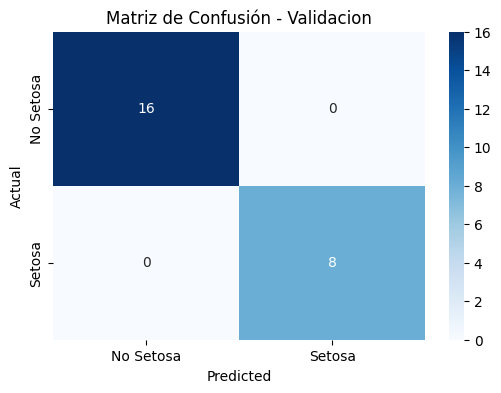

In [241]:



# Evaluación en conjunto de validación
y_pred_base_validation = base.predict(X_valid)
y_pred_base_validation = to_binary_predictions(y_pred_base_validation)


accuracy = accuracy_score(y_valid, y_pred_base_validation)
precision = precision_score(y_valid, y_pred_base_validation)
recall = recall_score(y_valid, y_pred_base_validation)
f1 = f1_score(y_valid, y_pred_base_validation)
f2 = fbeta_score(y_valid, y_pred_base_validation, beta=2)
roc_auc = roc_auc_score(y_valid, y_pred_base_validation)

print("--- MÉTRICAS DEL MODELO (Validación) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


# Matriz de confusión
conf_matrix = confusion_matrix(y_valid, y_pred_base_validation)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels =  ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Validacion')
plt.show()



### Nuevos modelos 

**modelo 3 capas y (10,15,20) neuronas**

In [242]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m1 = tf.keras.Sequential()
m1.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m1.add(tf.keras.layers.Dense(10, activation="relu"))
m1.add(tf.keras.layers.Dense(15, activation="relu"))
m1.add(tf.keras.layers.Dense(20, activation="relu"))
m1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [243]:
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556 (2.17 KB)

 Trainable params: 556 (2.17 KB)

 Non-trainable params: 0 (0.00 B)

In [244]:
m1.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [245]:
history_m1 = m1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - accuracy: 0.3190 - loss: 0.8558 - val_accuracy: 0.3333 - val_loss: 0.8230
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3190 - loss: 0.8230 - val_accuracy: 0.3333 - val_loss: 0.7952
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3190 - loss: 0.7938 - val_accuracy: 0.3333 - val_loss: 0.7703
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3190 - loss: 0.7678 - val_accuracy: 0.3333 - val_loss: 0.7481
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3190 - loss: 0.7448 - val_accuracy: 0.3333 - val_loss: 0.7282
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3190 - loss: 0.7240 - val_accuracy: 0.3750 - val_loss: 0.7100
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3451 - loss: 0.7051 - val_accuracy: 0.4167 - val_loss: 0.6938
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4284 - loss: 0.6882 - val_accuracy: 0.4167 - val_loss

In [246]:
y_pred_m1 = m1.predict(X_test)
y_pred_m1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[0.23154354],
       [0.91835093],
       [0.1650967 ],
       [0.2296144 ],
       [0.23570623],
       [0.8720066 ],
       [0.24406952],
       [0.18850292],
       [0.18976119],
       [0.23041569],
       [0.19623066],
       [0.9125891 ],
       [0.91032815],
       [0.9103899 ],
       [0.9565743 ],
       [0.22369082],
       [0.18537545],
       [0.21662566],
       [0.22357884],
       [0.18665208],
       [0.92434824],
       [0.21485052],
       [0.9083147 ],
       [0.19144763],
       [0.21856357],
       [0.1881578 ],
       [0.19666375],
       [0.17455114],
       [0.8942585 ],
       [0.9063272 ]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


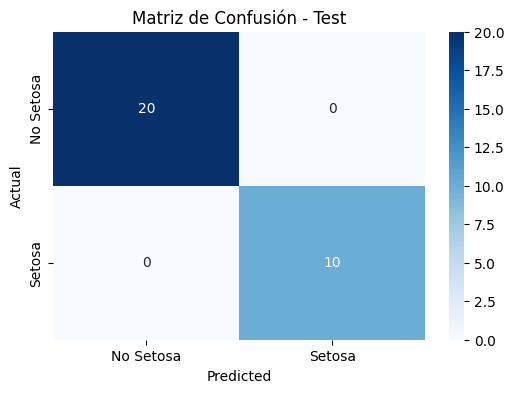

In [247]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)

# Example usage:
y_pred_m1 = to_binary_predictions(y_pred_m1)

print(y_pred_m1)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m1)
precision = precision_score(y_test, y_pred_m1)
recall = recall_score(y_test, y_pred_m1)
f1 = f1_score(y_test, y_pred_m1)
f2 = fbeta_score(y_test, y_pred_m1, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m1)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

**modelo 5 capas y (5,7,21,30,5) neuronas**

In [248]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m2 = tf.keras.Sequential()
m2.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m2.add(tf.keras.layers.Dense(5, activation="relu"))
m2.add(tf.keras.layers.Dense(7, activation="relu"))
m2.add(tf.keras.layers.Dense(21, activation="relu"))
m2.add(tf.keras.layers.Dense(30, activation="relu"))
m2.add(tf.keras.layers.Dense(5, activation="relu"))
m2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [249]:
m2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056 (4.12 KB)

 Trainable params: 1,056 (4.12 KB)

 Non-trainable params: 0 (0.00 B)

In [250]:
m2.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [251]:
history_m2 = m2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.6810 - loss: 0.6839 - val_accuracy: 0.6667 - val_loss: 0.6876
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6810 - loss: 0.6826 - val_accuracy: 0.6667 - val_loss: 0.6866
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6810 - loss: 0.6813 - val_accuracy: 0.6667 - val_loss: 0.6856
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6810 - loss: 0.6801 - val_accuracy: 0.6667 - val_loss: 0.6846
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6810 - loss: 0.6788 - val_accuracy: 0.6667 - val_loss: 0.6836
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6810 - loss: 0.6776 - val_accuracy: 0.6667 - val_loss: 0.6827
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6810 - loss: 0.6764 - val_accuracy: 0.6667 - val_loss: 0.6817
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6810 - loss: 0.6751 - val_accuracy: 0.6667 - val_loss

In [252]:
y_pred_m2 = m2.predict(X_test)
y_pred_m2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[0.35218978],
       [0.42215425],
       [0.12568443],
       [0.34330976],
       [0.26481375],
       [0.41967458],
       [0.40417627],
       [0.20176059],
       [0.34946993],
       [0.38603097],
       [0.24521063],
       [0.41237372],
       [0.4202728 ],
       [0.41288364],
       [0.4220981 ],
       [0.28928575],
       [0.21846117],
       [0.38435   ],
       [0.3996767 ],
       [0.23909013],
       [0.412166  ],
       [0.3016772 ],
       [0.41796634],
       [0.24315795],
       [0.12149478],
       [0.21332484],
       [0.23580469],
       [0.18881702],
       [0.41216937],
       [0.4122301 ]], dtype=float32)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 0.6667
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
F2 Score: 0.0000
ROC AUC Score: 0.5000


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


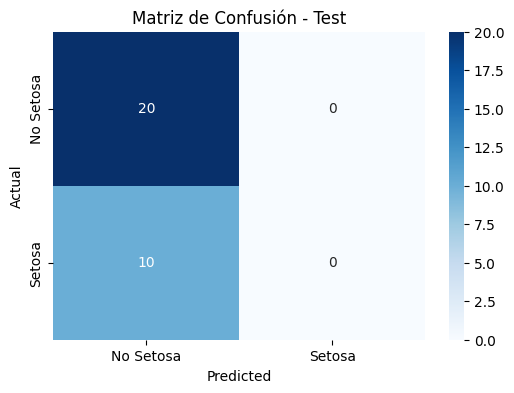

In [253]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)

# Example usage:
y_pred_m2 = to_binary_predictions(y_pred_m2)

print(y_pred_m2)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m2)
precision = precision_score(y_test, y_pred_m2)
recall = recall_score(y_test, y_pred_m2)
f1 = f1_score(y_test, y_pred_m2)
f2 = fbeta_score(y_test, y_pred_m2, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m2)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

**modelo 4 capas y (8,20,35,46) neuronas**

In [254]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m3 = tf.keras.Sequential()
m3.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m3.add(tf.keras.layers.Dense(8, activation="relu"))
m3.add(tf.keras.layers.Dense(20, activation="relu"))
m3.add(tf.keras.layers.Dense(35, activation="relu"))
m3.add(tf.keras.layers.Dense(46, activation="relu"))
m3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [255]:
m3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │           735 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 46)             │         1,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            47 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,658 (10.38 KB)

 Trainable params: 2,658 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

In [256]:
m3.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [257]:
history_m3 = m3.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.3190 - loss: 0.7287 - val_accuracy: 0.3333 - val_loss: 0.7205
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3190 - loss: 0.7206 - val_accuracy: 0.3333 - val_loss: 0.7137
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3281 - loss: 0.7127 - val_accuracy: 0.3750 - val_loss: 0.7071
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3620 - loss: 0.7052 - val_accuracy: 0.4167 - val_loss: 0.7006
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4336 - loss: 0.6978 - val_accuracy: 0.4583 - val_loss: 0.6944
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5078 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6883
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5651 - loss: 0.6836 - val_accuracy: 0.6250 - val_loss: 0.6824
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6888 - loss: 0.6767 - val_accuracy: 0.6667 - val_loss

In [258]:
y_pred_m3 = m3.predict(X_test)
y_pred_m3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


array([[0.18673584],
       [0.92280245],
       [0.05555035],
       [0.16670914],
       [0.15948536],
       [0.9055493 ],
       [0.18575232],
       [0.05319581],
       [0.13481471],
       [0.17247443],
       [0.07403139],
       [0.9170541 ],
       [0.9315625 ],
       [0.9143585 ],
       [0.9597033 ],
       [0.11004419],
       [0.06829823],
       [0.16037484],
       [0.17301357],
       [0.0805984 ],
       [0.92922276],
       [0.1167348 ],
       [0.9262809 ],
       [0.08847196],
       [0.04167   ],
       [0.06062624],
       [0.12521234],
       [0.04828097],
       [0.90207416],
       [0.9123498 ]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


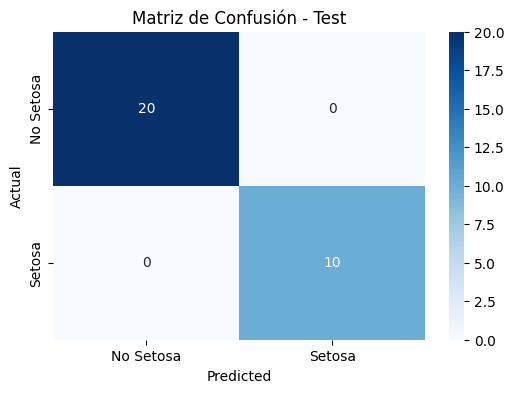

In [259]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)

# Example usage:
y_pred_m3 = to_binary_predictions(y_pred_m3)

print(y_pred_m3)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m3)
precision = precision_score(y_test, y_pred_m3)
recall = recall_score(y_test, y_pred_m3)
f1 = f1_score(y_test, y_pred_m3)
f2 = fbeta_score(y_test, y_pred_m3, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m3)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m3)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

## Punto 2: Clasificacion con redes neuronales - Datos heart

## Modelo Base

In [260]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [261]:
df = pd.read_csv('heart.csv')

In [262]:
df.shape

(303, 14)

In [263]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Seleccion de variables:**
Se seleccionan el siguinete subconjunto de variables: 

categoricas numericas: 'sex', 'exang', 'fbs'

categorica string: 'thal'

numerica: 'age', 'trestbps', 'chol'

In [264]:
df.drop(columns=['cp', 'restecg','ca','thalach', 'oldpeak', 'slope'])

,age,sex,trestbps,chol,fbs,exang,thal,target
0,63,1,145,233,1,0,fixed,0
1,67,1,160,286,0,1,normal,1
2,67,1,120,229,0,1,reversible,0
3,37,1,130,250,0,0,normal,0
4,41,0,130,204,0,0,normal,0
...,...,...,...,...,...,...,...,...
298,52,1,118,186,0,0,fixed,0
299,43,0,132,341,1,1,reversible,1
300,65,1,135,254,0,0,reversible,1
301,48,1,130,256,1,1,reversible,1


In [265]:
cat_int_feats = ['sex', 'fbs', 'exang']
cat_str_feats = ['thal']
num_feats = ['age', 'trestbps', 'chol']

In [266]:
feats_ordered = cat_int_feats+cat_str_feats+num_feats

In [267]:
df = df[feats_ordered+['target']]

In [268]:
df.head()

,sex,fbs,exang,thal,age,trestbps,chol,target
0,1,1,0,fixed,63,145,233,0
1,1,0,1,normal,67,160,286,1
2,1,0,1,reversible,67,120,229,0
3,1,0,0,normal,37,130,250,0
4,0,0,0,normal,41,130,204,0


Separacion de conjuntos: 

In [269]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,sex,fbs,exang,thal,age,trestbps,chol,target
69,0,0,0,normal,35,138,183,0
300,1,0,0,reversible,65,135,254,1
220,1,0,0,normal,59,134,204,0
134,1,1,0,reversible,42,120,240,0
7,0,0,1,normal,57,120,354,0


In [270]:
train.shape

(242, 8)

In [271]:
test = df.drop(train.index)
test.head()

,sex,fbs,exang,thal,age,trestbps,chol,target
0,1,1,0,fixed,63,145,233,0
2,1,0,1,reversible,67,120,229,0
4,0,0,0,normal,41,130,204,0
8,1,0,0,reversible,63,130,254,1
13,1,0,0,reversible,44,120,263,0


In [272]:
test.shape

(61, 8)

In [273]:
val = train.sample(frac=0.2, random_state=100)

In [274]:
val.shape

(48, 8)

In [275]:
train = train.drop(val.index)

In [276]:
print(train.shape)
print(val.shape)
print(test.shape)

(194, 8)
(48, 8)
(61, 8)


Función para convertir de dataframe (pandas) a dataset (tensorflow), separando características y etiquetas

In [277]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [278]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

In [279]:
type(train_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [280]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'sex': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'reversible'>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=65>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=135>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=254>}
Target: tf.Tensor(1, shape=(), dtype=int64)


In [281]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [282]:
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

In [283]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

In [284]:
inputs = []
for i in cat_int_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))

In [285]:
for i in cat_str_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))

In [286]:
for i in num_feats:
  inputs.append(keras.Input(shape=(1,), name=i))

In [287]:
for i in inputs:
   print(i)

<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=sex>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=fbs>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=exang>
<KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=thal>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=age>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=trestbps>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=chol>


In [288]:
feats_encoded=[]

In [289]:
for i,feat in enumerate(cat_int_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )

In [290]:
len_feats = len(feats_encoded)
len_feats

3

In [291]:
for i,feat in enumerate(cat_str_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )

In [292]:
len_feats = len(feats_encoded)
len_feats

4

In [293]:
for i,feat in enumerate(num_feats):
  feats_encoded.append(
      encode_numerical_feature(inputs[len_feats+i], feat, train_ds)
  )

In [294]:
for i in feats_encoded:
  print(i)

<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_16>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_17>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_18>
<KerasTensor shape=(None, 6), dtype=float32, sparse=False, ragged=False, name=keras_tensor_19>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_20>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_21>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_22>


Creamos una capa concatenando todas las variables codificadas

In [295]:
all_feats = keras.layers.concatenate(feats_encoded)

In [296]:
type(all_feats)

keras.src.backend.common.keras_tensor.KerasTensor

Agregamos una capa densa con 32 neuronas y función de activación relu

In [297]:
model_layers = keras.layers.Dense(32, activation='relu')(all_feats)

Creamos una capa concatenando todas las variables codificadas

In [298]:
model_layers = keras.layers.Dense(1, activation='sigmoid')(model_layers)

Creamos el modelo con las capas ya creadas y las variables de entrada

In [299]:
model = keras.Model(inputs, model_layers)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [300]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [301]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

You must install pydot (`pip install pydot`) for `plot_model` to work.


Aseguramos que Keras use TensorFlow como backend, para asegurar que el modelo pueda usar strings como entradas

In [302]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

## Entrenamineto

In [303]:
hostory = model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.5068 - loss: 0.7083 - val_accuracy: 0.6042 - val_loss: 0.6779
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5876 - loss: 0.6888 - val_accuracy: 0.6875 - val_loss: 0.6551
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6738 - loss: 0.6515 - val_accuracy: 0.7292 - val_loss: 0.6314
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6690 - loss: 0.6327 - val_accuracy: 0.7708 - val_loss: 0.6106
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7337 - loss: 0.6092 - val_accuracy: 0.7500 - val_loss: 0.5941
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7348 - loss: 0.5986 - val_accuracy: 0.7708 - val_loss: 0.5812
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7614 - loss: 0.5807 - val_accuracy: 0.7708 - val_loss: 0.5694
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7387 - loss: 0.5827 - val_accuracy: 0.7708 - val_loss: 0.55

In [304]:
print(test_ds)
y_pred_modelo= model.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo


<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step
61


array([[0.05897321],
       [0.02371877],
       [0.02210143],
       [0.00998713],
       [0.33193728],
       [0.06112125],
       [0.16288286],
       [0.52265894],
       [0.14603306],
       [0.16345912],
       [0.20642877],
       [0.03891967],
       [0.3723584 ],
       [0.13817649],
       [0.32662925],
       [0.5671352 ],
       [0.491808  ],
       [0.03138295],
       [0.6632776 ],
       [0.07744108],
       [0.2056958 ],
       [0.6355524 ],
       [0.72978747],
       [0.05450707],
       [0.63145244],
       [0.4477168 ],
       [0.10644888],
       [0.03934339],
       [0.08088997],
       [0.03645201],
       [0.35205245],
       [0.01324318],
       [0.5456934 ],
       [0.04842825],
       [0.6317536 ],
       [0.02055681],
       [0.13649505],
       [0.41031796],
       [0.02939211],
       [0.01445499],
       [0.0751044 ],
       [0.66779196],
       [0.597394  ],
       [0.5915866 ],
       [0.19915907],
       [0.01480404],
       [0.14705214],
       [0.530

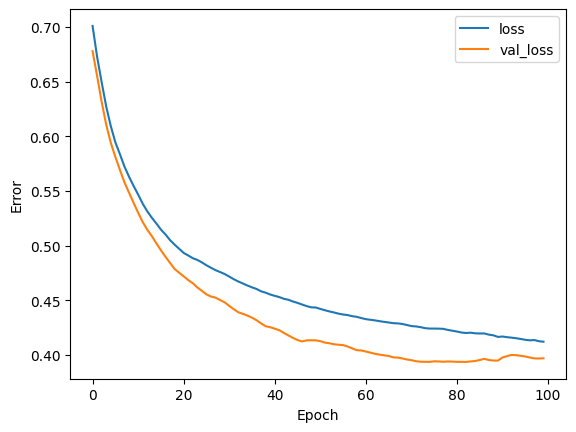

In [305]:
plt.plot(hostory.history['loss'], label='loss')
plt.plot(hostory.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

In [ ]:
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)

# Example usage:
y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

[0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


ValueError: Found input variables with inconsistent numbers of samples: [30, 61]